In [ ]:
'''
title: Hackathon
author: hazeez
date: May 03, 2020
objective: to read the provided `company.csv` file and to do data pre-processing and visualization to come up with
interesting insights
'''

# Hackathon

## Description of the dataset

The dataset has the employee and the company information - across age, place, country and gender. The data is unclean.

## Approach

> The approach
- Step1 : Data cleaning
- Step2 : Feature extraction
- Step3 : Visualization
- Step4 : Summary

## Step1: Data cleaning

In [104]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer as si

In [105]:
# set default options
pd.set_option("display.max.columns", None)
pd.set_option("display.precision",0)

In [106]:
# setting the color palette
flatui = ["#9b59b6", "#2ecc71", '#EA6A47','#1C4E80', '#0091D5','#B3C100', '#4CB5F5', '#1F3F49', '#D32D41', '#6AB187', '#23282D','#A5D8DD','#7E909A']

In [136]:
cpy = pd.read_csv('Company.csv')
print(cpy.head())
print(cpy.shape)

   Company  Age  Salary     Place Country  Gender
0      TCS   20     NaN   Chennai   India       0
1  Infosys   30     NaN    Mumbai   India       0
2      TCS   35      23  Calcutta   India       0
3  Infosys   40      30     Delhi   India       0
4      TCS   23      40    Mumbai   India       0
(148, 6)


### Cleaning up redundant values

In [137]:
cpy.isna().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [138]:
cpy['Company'].value_counts()

TCS                          53
Infosys                      45
CTS                          36
Congnizant                    2
Tata Consultancy Services     2
Infosys Pvt Lmt               2
Name: Company, dtype: int64

In [139]:
infy = cpy['Company'].str.contains('Infosys Pvt Lmt')
tcs = cpy['Company'].str.contains('Tata Consultancy')
cog = cpy['Company'].str.contains('Congnizant')
cpy['Company'] = np.where(infy, 'Infosys', cpy['Company'])
cpy['Company'] = np.where(tcs, 'TCS', cpy['Company'])
cpy['Company'] = np.where(cog, 'CTS', cpy['Company'])

In [140]:
cpy[cpy['Age'] == 0]

,Company,Age,Salary,Place,Country,Gender
88,Infosys,,3030,Calcutta,India,0
92,TCS,,3045,Delhi,India,0
101,CTS,,2034,Podicherry,India,0
107,TCS,,9024,Chennai,India,1
111,Infosys,,3234,Mumbai,India,0
121,CTS,,1234,Calcutta,India,0


In [141]:
# delete all rows where age is 0
cpy.drop(cpy[cpy['Age'] == 0].index, inplace = True)
cpy.shape

(142, 6)

In [152]:
# delete rows here place is null
cpy_master =  cpy.copy()

In [150]:
# fill age NA values with mean

cpy['Age'] = cpy['Age'].fillna(cpy['Age'].mean())
cpy['Salary'] = cpy['Salary'].fillna(cpy['Salary'].mean())

In [151]:
cpy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  142 non-null    object 
 1   Age      142 non-null    float64
 2   Salary   142 non-null    float64
 3   Place    128 non-null    object 
 4   Country  142 non-null    object 
 5   Gender   142 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.8+ KB


In [157]:
# drop na values in place column
cpy = cpy.dropna()

In [159]:
# change datatypes of salary and age
cpy['Age'] = cpy['Age'].astype('int64')
cpy['Salary'] = cpy['Salary'].astype('int64')

In [168]:
# change company, place, country to categorical data

cpy["Company"] = pd.Categorical(cpy['Company'])
cpy["Place"] = pd.Categorical(cpy['Place'])
cpy["Country"] = pd.Categorical(cpy['Country'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Company  128 non-null    category
 1   Age      128 non-null    int64   
 2   Salary   128 non-null    int64   
 3   Place    128 non-null    category
 4   Country  128 non-null    category
 5   Gender   128 non-null    int64   
dtypes: category(3), int64(3)
memory usage: 5.0 KB


### Step 2: Feature Engineering

In [174]:
cpy['Age'].value_counts().keys().sort_values()

Int64Index([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 30, 31, 32, 33, 34, 35, 36,
            37, 38, 40, 41, 43, 44, 45, 46, 50, 51, 54],
           dtype='int64')

In [177]:
cpy['Salary'].value_counts().keys().sort_values()

Int64Index([1089, 1234, 2034, 2300, 2934, 3000, 3030, 3033, 3045, 3184, 3234,
            3454, 4000, 4034, 4324, 4345, 4824, 5000, 5034, 5098, 5399, 5435,
            5555, 5835, 6000, 6543, 6544, 7000, 7084, 7654, 8000, 8202, 8345,
            8787, 8943, 9000, 9024, 9284, 9876],
           dtype='int64')

In [185]:
# Divide the age into age groups

def age_groups(x):
    if x <= 20:
        return '<20'
    elif x > 20 and x <= 30:
        return '20 to 30'
    elif x > 30 and x <= 40:`
        return '30 to 40'
    else:
        return '>40'

In [186]:
cpy['Age Group'] = cpy['Age'].apply(age_groups)

In [200]:
# Divide the place into "North India and South India"

def north_south(x):
    north_india = ['Mumbai','Calcutta','Delhi','Noida','Bhopal','Nagpur','Pune']
    south_inda = ['Chennai','Podicherry','Cochin','Hyderabad']
    if x in north_india:
        return 'North India'
    else:
        return 'South India'

In [198]:
cpy['North or South'] = cpy['Place'].apply(north_south)

In [189]:
# Divide the salary into salary groups

def salary_groups(x):
    if x <= 3000:
        return '<3000'
    elif x > 3000 and x <= 6000:
        return '3000 to 6000'
    else:
        return '>6000'

In [190]:
cpy['Salary Group'] = cpy['Salary'].apply(salary_groups)

In [203]:
# Gender into a Male or Female

def gender_groups(x):
    if x == 0:
        return 'Female'
    else:
        return 'Male'

In [204]:
cpy['Gender Group'] = cpy['Gender'].apply(gender_groups)

In [313]:
# modified dataframe after feature engineering

In [314]:
cpy.head()

,Company,Age,Salary,Place,Country,Gender,Age Group,Salary Group,North or South,Gender Group
0,TCS,20,5399,Chennai,India,0,<20,3000 to 6000,South India,Female
1,Infosys,30,5399,Mumbai,India,0,20 to 30,3000 to 6000,North India,Female
2,TCS,35,2300,Calcutta,India,0,30 to 40,<3000,North India,Female
3,Infosys,40,3000,Delhi,India,0,30 to 40,<3000,North India,Female
4,TCS,23,4000,Mumbai,India,0,20 to 30,3000 to 6000,North India,Female


### Step 3: Analysis and Visualizations

In [309]:
# The following are the questions that we would answer in the data analysis

# top paid employer
# employer with most employees
# age group by company
# age group by salary
# salary distribution by gender - any discrimination
# age distribution by gender
# employees by north or south
# salary by north or south - who is paid more?

---

#### Key observation: 

- **TCS** is the **highest** salary payer
- **Cognizant** is the **lowest** salary payer



In [311]:
# top paid employer with mean salary

top_salary_payers = cpy[['Company', 'Salary']].groupby('Company').mean()
print("***TCS is the highest salary payer***")
print("\n")
print(top_salary_payers)

***TCS is the highest salary payer***


         Salary
Company        
CTS        4836
Infosys    5342
TCS        5377


---

#### Key observation: 

- **TCS** employs the **most** number of employees
- **Cognizant** employes the **least** number of employees

In [306]:
# employer with most employees

employers_with_most_employees = cpy['Company'].value_counts()
print("***TCS employs the most number of employees***")
print("\n")
print(employers_with_most_employees)

***TCS employs the most number of employees***


TCS        46
Infosys    42
CTS        40
Name: Company, dtype: int64


---

#### Key observation:

- **% of Male employees** are **more in TCS** than in any other companies
- All the three companies have **almost equal number of Female employees**



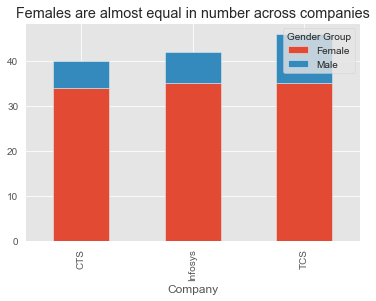

In [379]:
# employees by company by gender
plt.style.use('ggplot')
emp_company_gender = cpy[['Company', 'Gender Group', 'Age']].groupby(['Company','Gender Group']).count()
emp_company_gender = emp_company_gender.reset_index()
emp_company_gender = pd.DataFrame(emp_company_gender, columns=['Company', 'Gender Group', 'Age'])
emp_company_gender = emp_company_gender.set_index(['Company', 'Gender Group']).Age
emp_company_gender.unstack().plot(kind='bar', stacked=True)
plt.title('Females are almost equal in number across companies')
plt.show()

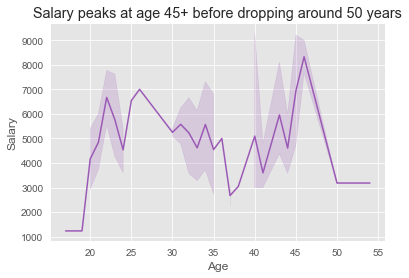

In [400]:
# age and salary

age_salary_trend_data = cpy[['Age','Salary']]
sns.lineplot(x='Age', y='Salary', data=age_salary_trend_data)
plt.title('Salary peaks at age 45+ before dropping around 50 years')
plt.show()

---

#### Key observations:

- Males of age **20 to 25** are only in **Mumbai and Calcutta**
- **Chennai and Bhopal does not have male employees**
- Most of the **Males** are around **mid age - 35 to 45** across locations
- **All of 50+ years employees are Females**
- **Metropolitan cities** - Mumbai, Chennai, Delhi and Calcutta **have more employees**

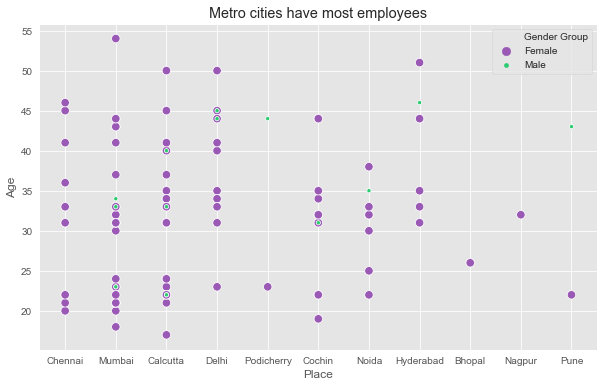

In [417]:
# Employees across age across place
plt.figure(figsize=(10,6))
emp_age_place_data = cpy[['Gender Group', 'Age', 'Place']]
sns.scatterplot(x='Place', y='Age', size='Gender Group', data=emp_age_place_data, hue='Gender Group', 
               palette = sns.set_palette(flatui, n_colors = emp_age_place_data['Gender Group'].nunique()))
plt.title('Metro cities have most employees')
plt.show()

---

#### Key observation: 

- Employees in age group **30 to 40** are more across companies
- Second most age group is **20 to 30**

In [425]:
# age group by company
age_by_cpy = cpy[['Company', 'Age Group']].groupby('Age Group').count()

# age group by salary
age_by_salary = cpy[['Salary', 'Age Group']].groupby('Age Group').mean()

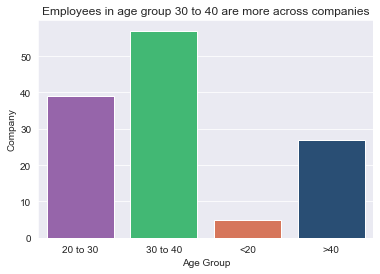

In [253]:
sns.set_style('darkgrid')
sns.barplot(x=age_by_cpy.index, y='Company', data=age_by_cpy, palette=flatui)
plt.title('Employees in age group 30 to 40 are more across companies')
plt.show()

---

#### Key observation: 

- Employees in age group **20 to 30** are drawing **higher salaries**
- Age group **30 to 40** and **greater than 40 years** draw **equal** salaries 

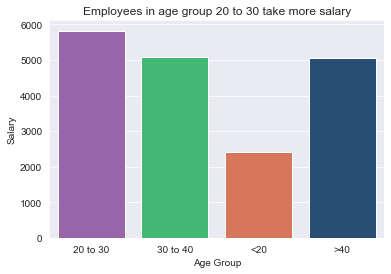

In [310]:
sns.set_style('darkgrid')
sns.barplot(x=age_by_salary.index, y='Salary', data=age_by_salary, palette=flatui)
plt.title('Employees in age group 20 to 30 take more salary')
plt.show()

---

#### Key observation: 

- **Males** take **140%** higher salaries than women
- As per this data, there is **gender discrimination** / Males are more in **specialized job roles**

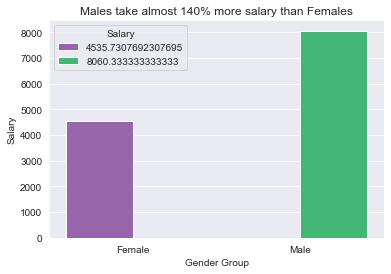

In [297]:
# Salary distribution by gender

gender_salary = cpy[['Salary', 'Gender Group']].groupby('Gender Group').mean()
sns.barplot(x=gender_salary.index, y='Salary', data=gender_salary, palette=flatui, hue='Salary')
plt.title('Males take almost 140% more salary than Females')
plt.show()

---

#### Key observations:

- Most employees draw between 400o to 6000
- **Younger people <20 years** don't draw higher salaries
- Almost all the locations provide salaries between 8000 to 1000
- Employees greater than 40 years draw higher salaries only in few locations namely Delhi, Hyderabad, Podicherry and Pune

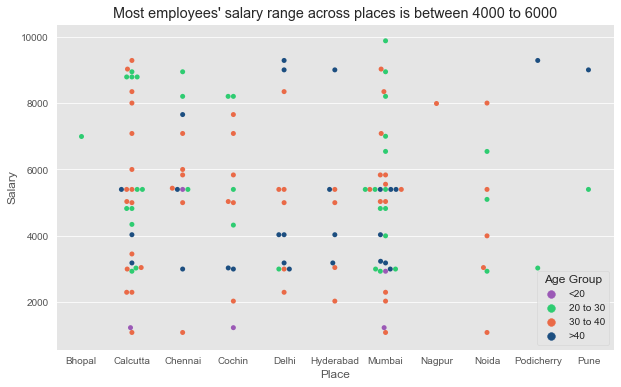

In [423]:
# Salary across age across place
plt.figure(figsize=(10,6))
sal_age_place_data = cpy[['Salary', 'Age Group', 'Place']]
sns.swarmplot(x='Place', y='Salary',data=sal_age_place_data, hue='Age Group', palette=flatui)
plt.title("Most employees' salary range across places is between 4000 to 6000")
plt.show()

---

#### Key observation: 

- **Female** employees are **more than 5 times** than their counterpart

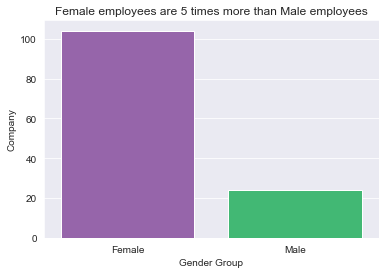

In [278]:
# count of employees by Gender

count_gender = cpy[['Company', 'Gender Group']].groupby('Gender Group').count()
sns.barplot(x=count_gender.index, y='Company', data=count_gender, palette=flatui)
plt.title('Female employees are 5 times more than Male employees')
plt.show()

---

#### Key observation: 

- Male and female employees have the **same mean age**

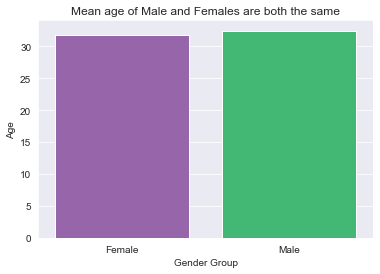

In [286]:
# age distribution by gender

gender_age = cpy[['Age', 'Gender Group']].groupby('Gender Group').mean()
sns.barplot(x=gender_age.index, y='Age', data=gender_age, palette=flatui)
plt.title('Mean age of Male and Females are both the same')
plt.show()

---

#### Key observation: 

- **Males** in **North India** take **higher salaries**
- **Females** in **South India** take **higher salaries**

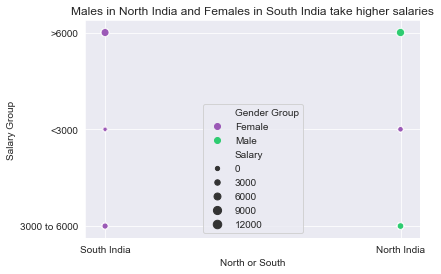

In [296]:
emp_north_salary = cpy[['North or South', 'Salary Group', 'Gender Group', 'Salary']]
sns.scatterplot(x='North or South', y='Salary Group', data=emp_north_salary, hue='Gender Group', size='Salary', palette=sns.color_palette(flatui, n_colors=2))
plt.title('Males in North India and Females in South India take higher salaries')
plt.show()

---

#### Key observation: 

- **South Indian** employees take **slightly more** salary than their North Indian counterparts

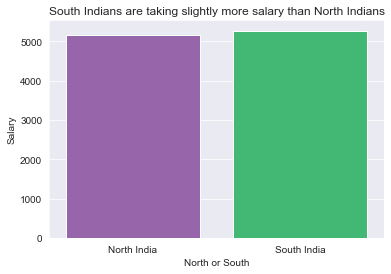

In [304]:
emp_north_south = cpy[['North or South', 'Salary']].groupby('North or South').mean()
sns.barplot(emp_north_south.index, y='Salary', data=emp_north_south, palette=flatui)
plt.title('South Indians are taking slightly more salary than North Indians')
plt.show()

### Step 4: Conclusion

The dataset had information about the company and the employees. The dataset was unclean and the data cleaning steps were carried out. Additional columns were inserted to the data to provide more meaningful insights. 

Graphs were added to bring more clarity to the data.

> Key observations:
-  TCS is the highest salary payer
- TCS employs the most number of employees
- Employees in age group 30 to 40 are more across companies
- Employees in age group 20 to 40 take more salary
- Males take almost 140% more salary than Females
- Female employees are 5 times more than Male employees
- Mean age of Male and Females are both the same
- Males in North India and Females in South India take higher salaries
- South Indians are taking slightly more salary than North Indians